# My Spotify Top Streams EDA
*by Merve H. Tas Bangert* 

###### The dataset consists of my personal data retrieved from Spotify. Here I am perofrming an exploratory data analysis on the provided data. The provided data consisted of 2 JSON files: streaming audio history between 2019-2022, streaming audio history between 2022-2023 and streaming audio history of 2023. ######

In [23]:
import glob
import numpy as np
import json
import textwrap
from collections import Counter
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def spotify_login(cid, secret):
    """ 
    Function to access Spotify 
    
    :cid: spotify API client_id
    :secret: spotify API client_secret
    
    """
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    return spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def format_track_name(row):
    """Function to format track name rows"""
    return f"{row['master_metadata_track_name']} - {row['master_metadata_album_artist_name']}"


def plot_counts(data, xlabel, labels=None, rotation=45):
    """ 
    Function to create count plots

    :data: dataframe(s), can be a list of dataframes as well
    :xlabel: x-axis label 
    :labels: Plot title label
    :rotation: rotation of the x tick labels 
    
    """
    if isinstance(data, pd.Series):
        num_plots = 1
    else:
        num_plots = len(data)

    fig, axs = plt.subplots(num_plots, 1, figsize=(18, 11 * num_plots))

    if not labels:
        if num_plots == 1:
            labels = [f'Top Most Streamed {xlabel}']
        else:
            labels = [f'Top Most Streamed {xlabel} {i+1}' for i in range(num_plots)]

    for i in range(num_plots):
        ax = axs[i] if num_plots > 1 else axs
        if num_plots > 1:
            df = data[i]
        else:
            df = data
        df.plot(kind="bar", color='darkgreen', ax=ax)
        ax.set_xlabel(xlabel)
        ax.set_ylabel('Stream Count')
        ax.set_title(labels[i])
        ax.tick_params(axis='x', rotation=rotation, labelsize=8)

        if num_plots > 1:
            ax.set_xticklabels([textwrap.fill(label, 20) for label in df.index], rotation=rotation, fontsize=8)
        else:
            ax.set_xticklabels([textwrap.fill(label, 20) for label in df.index], rotation=rotation, fontsize=8)

        ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplots_adjust(hspace=0.5)
    plt.rc('axes', axisbelow=True)

    plt.show()

In [25]:
# get json files send by Spotify 

data_dir = r"C:\Users\Administrator\Desktop\merve_projects\MyData"
data = glob.glob(rf"{data_dir}\*Audio*.json")

In [26]:
#Login to Spotify 

cid = "feb1f38770f244e5a2b19f9524da2cd6"
secret = "ff2e2c432134401a9e45646d6d5010af"

sp = spotify_login(cid, secret)

In [27]:
# Here I am reading the json files with pandas, removing the unnecessary columns and adding artist name to the track name 

dfs_csv = []
for i in data:
    with open(i, encoding="utf8") as f:
        df = pd.read_json(f)
        #df = df[["master_metadata_track_name", "master_metadata_album_artist_name", "master_metadata_album_album_name", "conn_country"]]
        df = df.dropna(subset=["master_metadata_track_name"])
        df["master_metadata_track_name"] = df.apply(format_track_name, axis=1)
    dfs_csv.append(df)

# 2023 is concatenated with 2022-2023
concat_df = pd.concat([dfs_csv[1], dfs_csv[2]])

# Ultimately our dataframes are: [2019-2022 and 2022-2023] and all dataframes concatenated
dfs_csv = [dfs_csv[0], concat_df]
df_all = pd.concat([dfs_csv[0], concat_df])

df_all.tail()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
539,2023-10-14T16:42:32Z,90c6xy8b9iy5s1tny12j2yk23,android,194423,DE,46.114.174.81,unknown,The Perfect Girl - Mareux,Mareux,The Perfect Girl,...,None,None,None,playbtn,trackdone,False,0.0,False,1697301561,False
540,2023-10-14T16:43:13Z,90c6xy8b9iy5s1tny12j2yk23,android,38864,DE,46.114.174.81,unknown,GigaChad Theme - Phonk House Version - g3ox_em,g3ox_em,GigaChad Theme,...,None,None,None,trackdone,endplay,False,1.0,False,1697301755,False
541,2023-10-14T16:43:15Z,90c6xy8b9iy5s1tny12j2yk23,android,1265,DE,46.114.174.81,unknown,The Beautiful People - Marilyn Manson,Marilyn Manson,Antichrist Superstar,...,None,None,None,playbtn,endplay,False,1.0,False,1697301797,False
542,2023-10-14T16:46:53Z,90c6xy8b9iy5s1tny12j2yk23,android,218826,DE,46.114.174.81,unknown,The Beautiful People - Marilyn Manson,Marilyn Manson,Antichrist Superstar,...,None,None,None,playbtn,trackdone,False,0.0,False,1697301798,False
543,2023-10-14T17:39:02Z,90c6xy8b9iy5s1tny12j2yk23,android,164536,DE,91.96.28.59,unknown,Killing Loneliness - HIM,HIM,Dark Light,...,None,None,None,trackdone,logout,False,0.0,False,1697302016,False


In [49]:
df_all.columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [28]:
# Extract top 10 most streamed tracks and artists for the different years
top_tracks = [i["master_metadata_track_name"].value_counts().nlargest(10) for i in dfs_csv]
top_artists = [i["master_metadata_album_artist_name"].value_counts().nlargest(10) for i in dfs_csv]

top_tracks[1]

master_metadata_track_name
Hotel - Lawsy                                124
Sorry You're Not a Winner - Enter Shikari    113
You - Flansie                                107
Escapism. - RAYE                             101
moment - Vierre Cloud                         99
Spirit Wave - Mall Grab                       95
Sure Thing - Miguel                           69
Disappearing Boy - Green Day                  68
Boy's a Liar Pt. 2 - PinkPantheress           67
Positive Energy Forever - Mall Grab           65
Name: count, dtype: int64

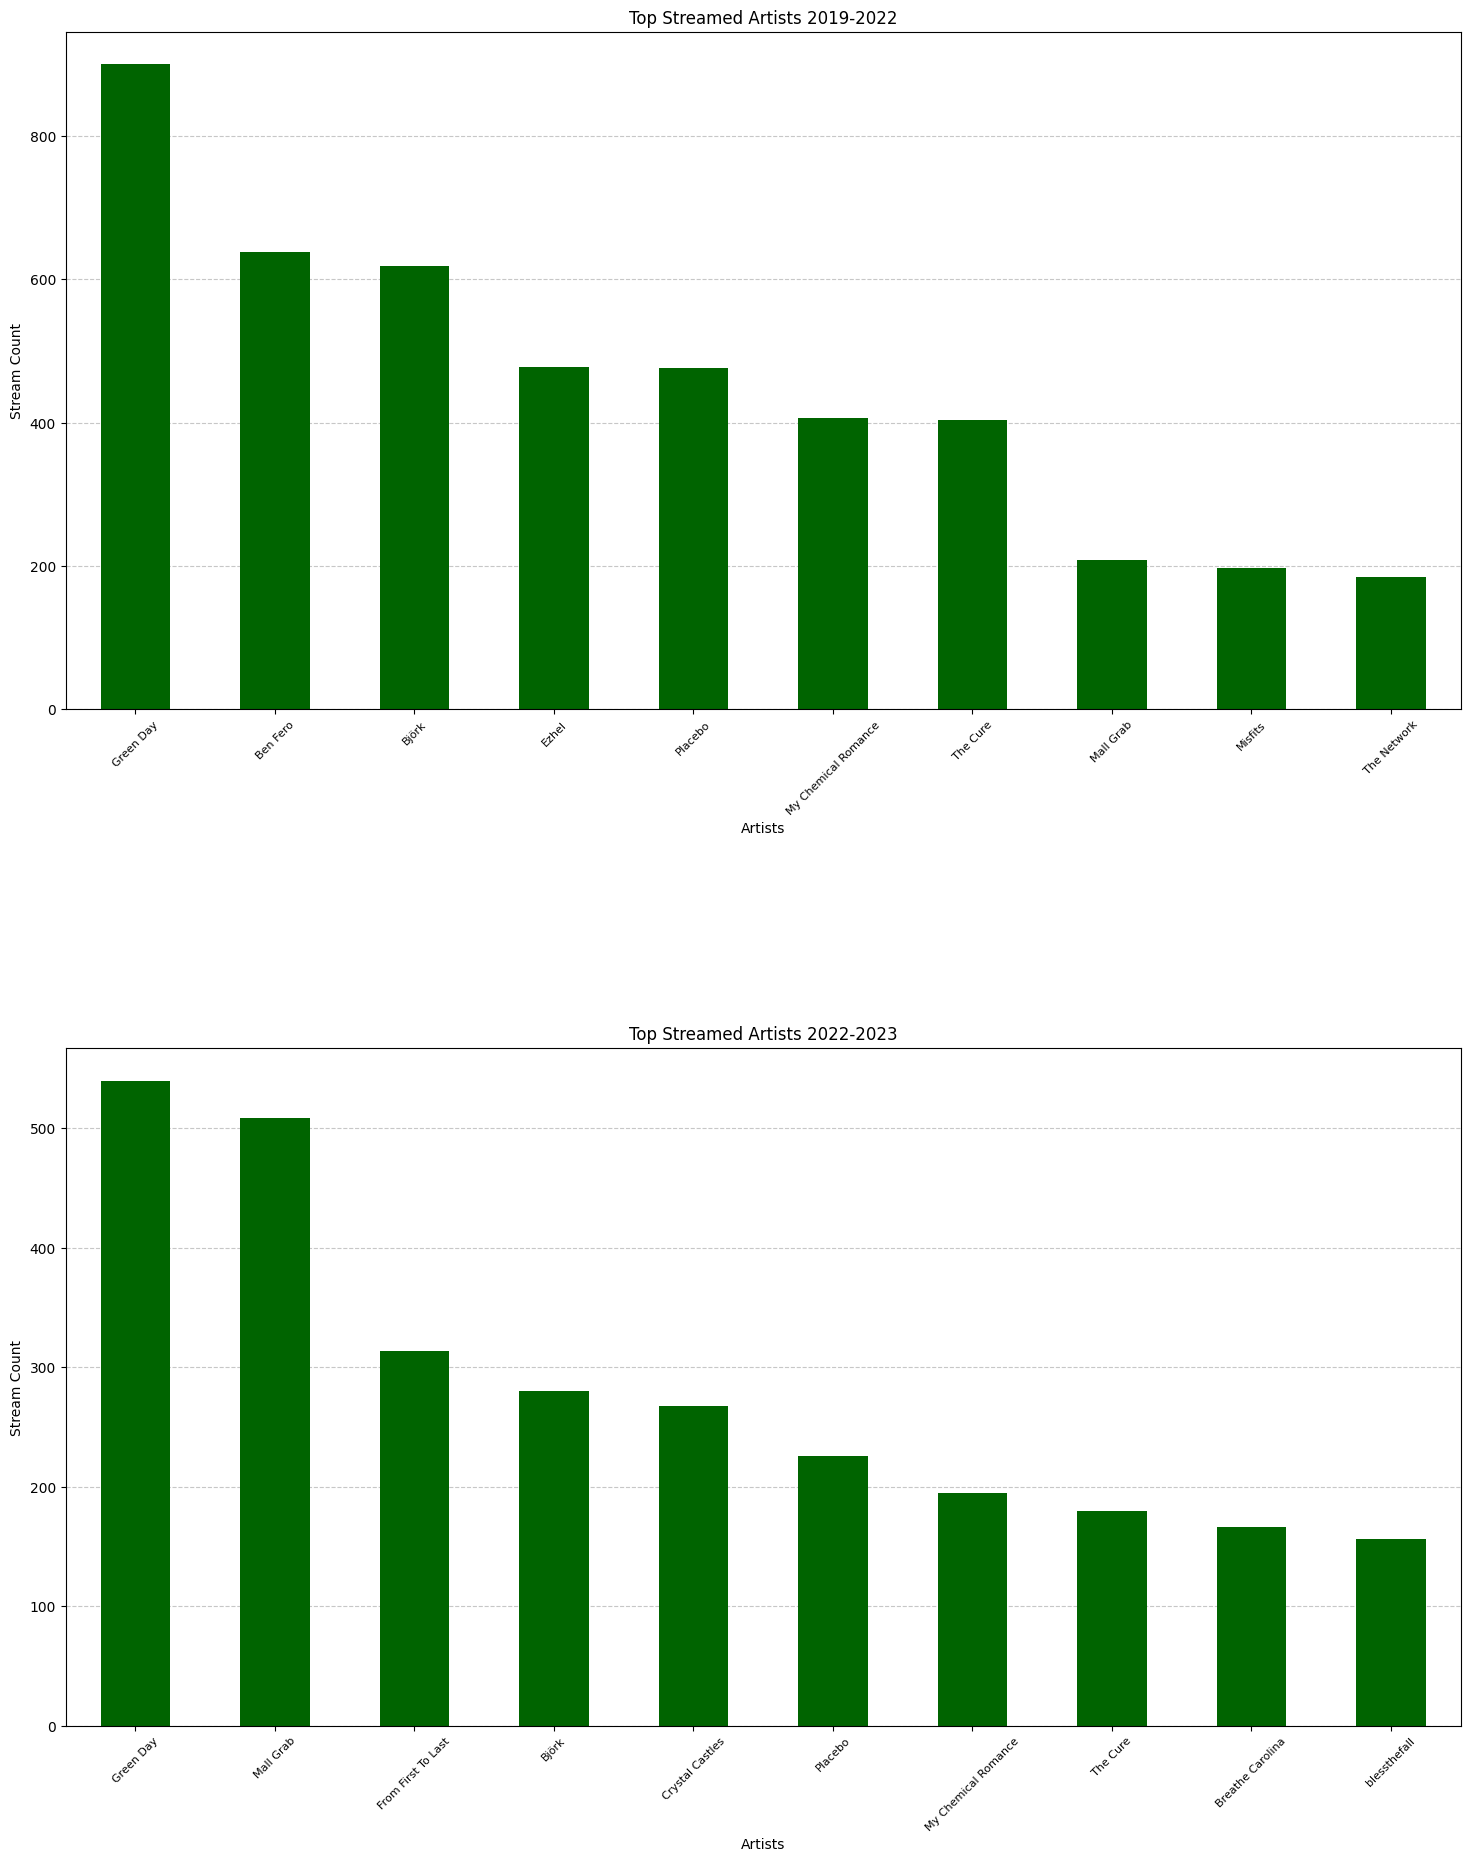

In [29]:
# Plotting top 10 most streamed artists 2019-2022 and 2022-2023
plot_counts(top_artists, "Artists", labels=["Top Streamed Artists 2019-2022", "Top Streamed Artists 2022-2023"])
plt.close()

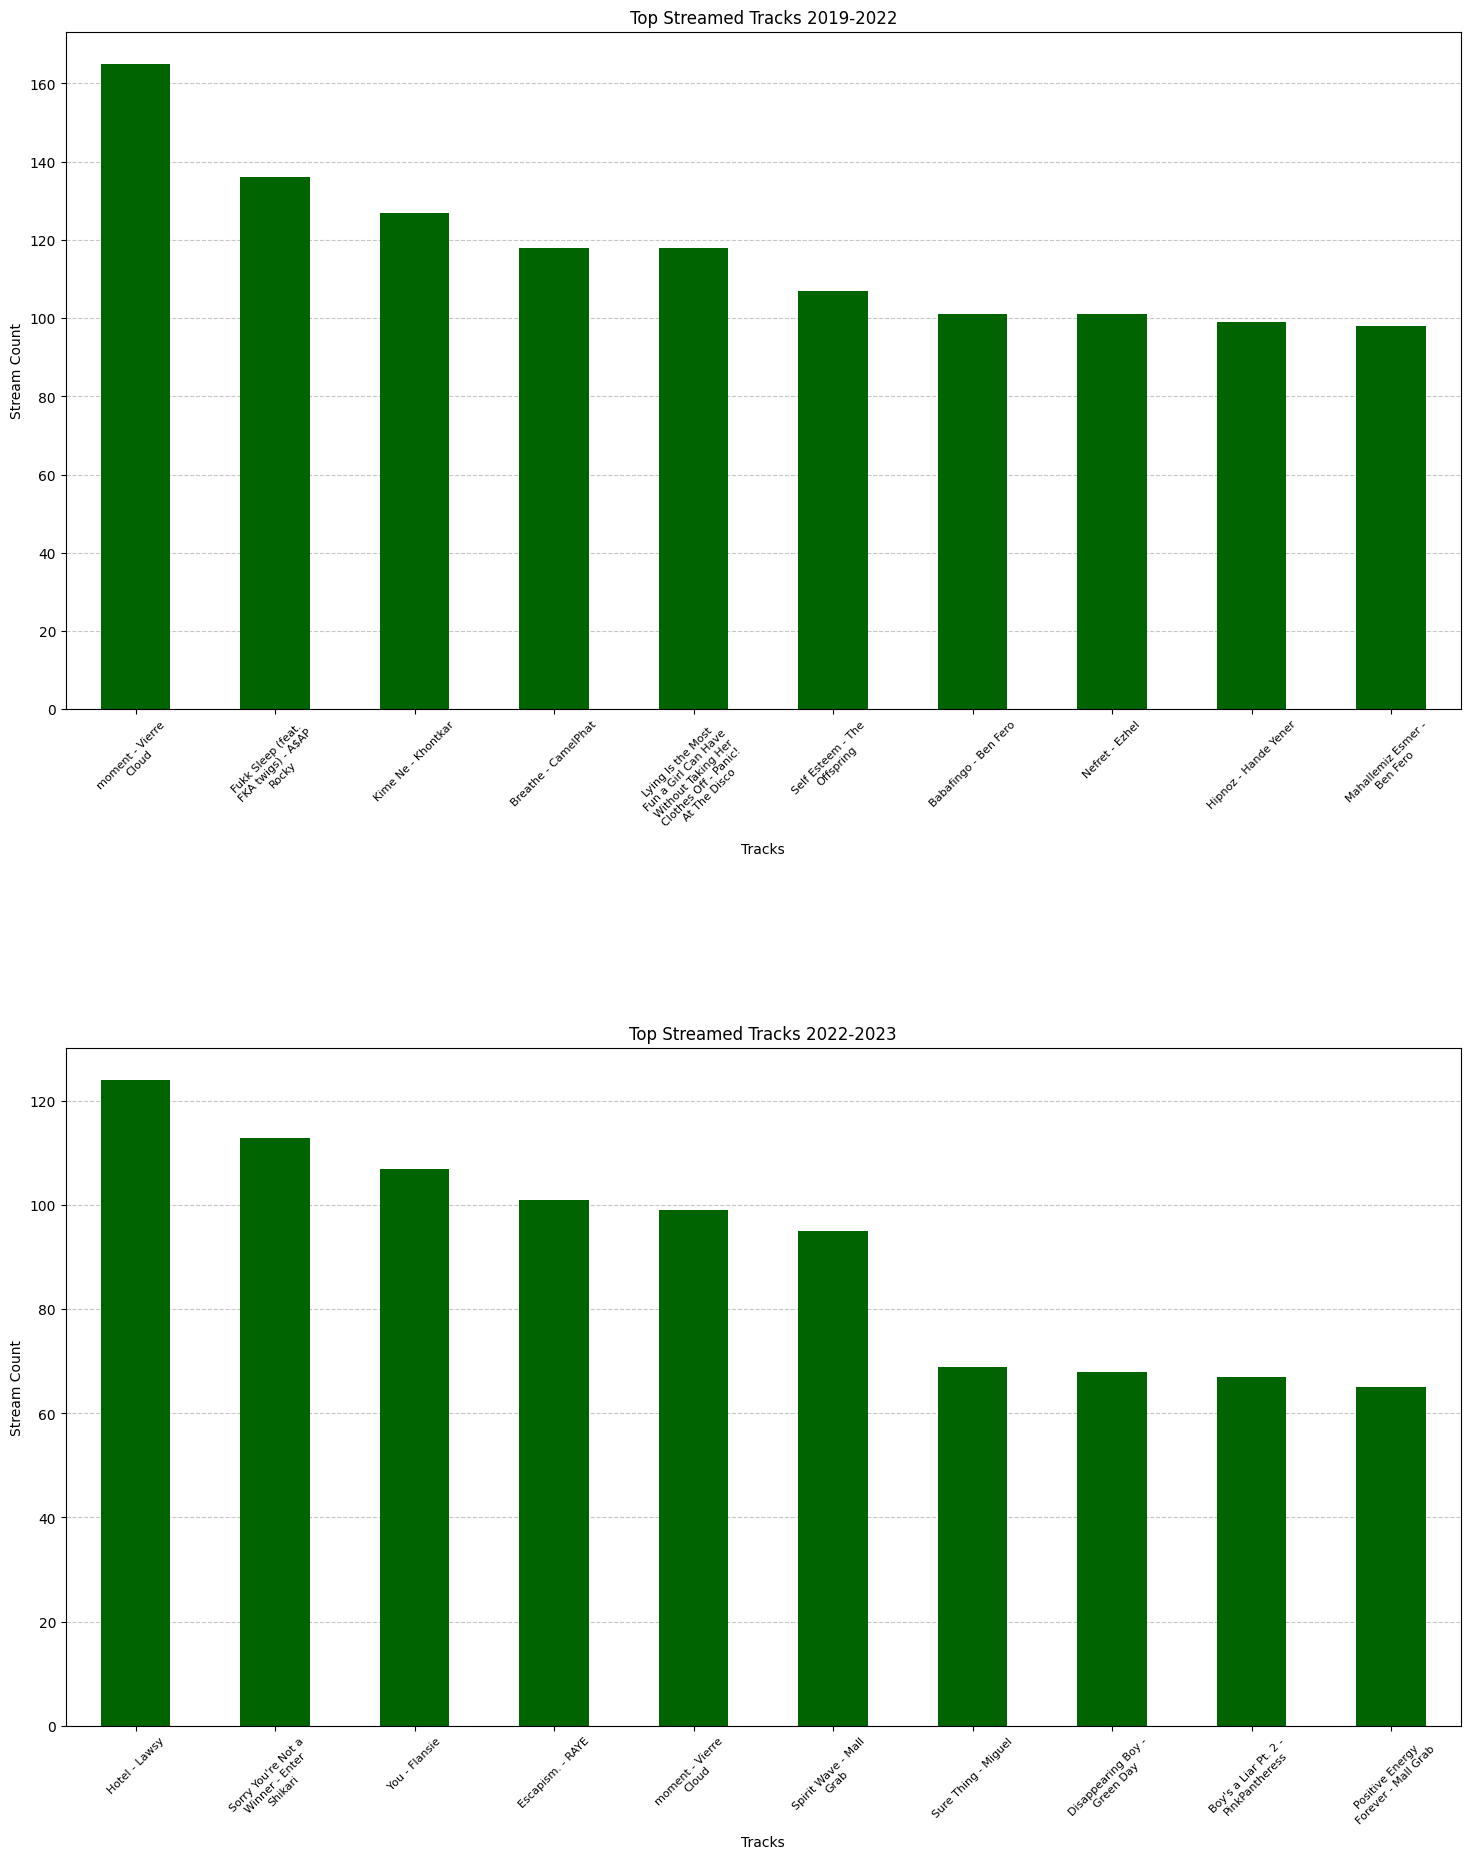

In [30]:
# Plotting top 10 most streamed tracks 2019-2022 and 2022-2023
# looks like I completely stopped listening to Turkish musc after 2022 

plot_counts(top_tracks, "Tracks", labels=["Top Streamed Tracks 2019-2022", "Top Streamed Tracks 2022-2023"])
plt.close()

In [31]:
# get top 10 most streamed artists and tracks of all data
top_tracks_all = df_all["master_metadata_track_name"].value_counts().nlargest(10) 
top_artists_all = df_all["master_metadata_album_artist_name"].value_counts().nlargest(10)

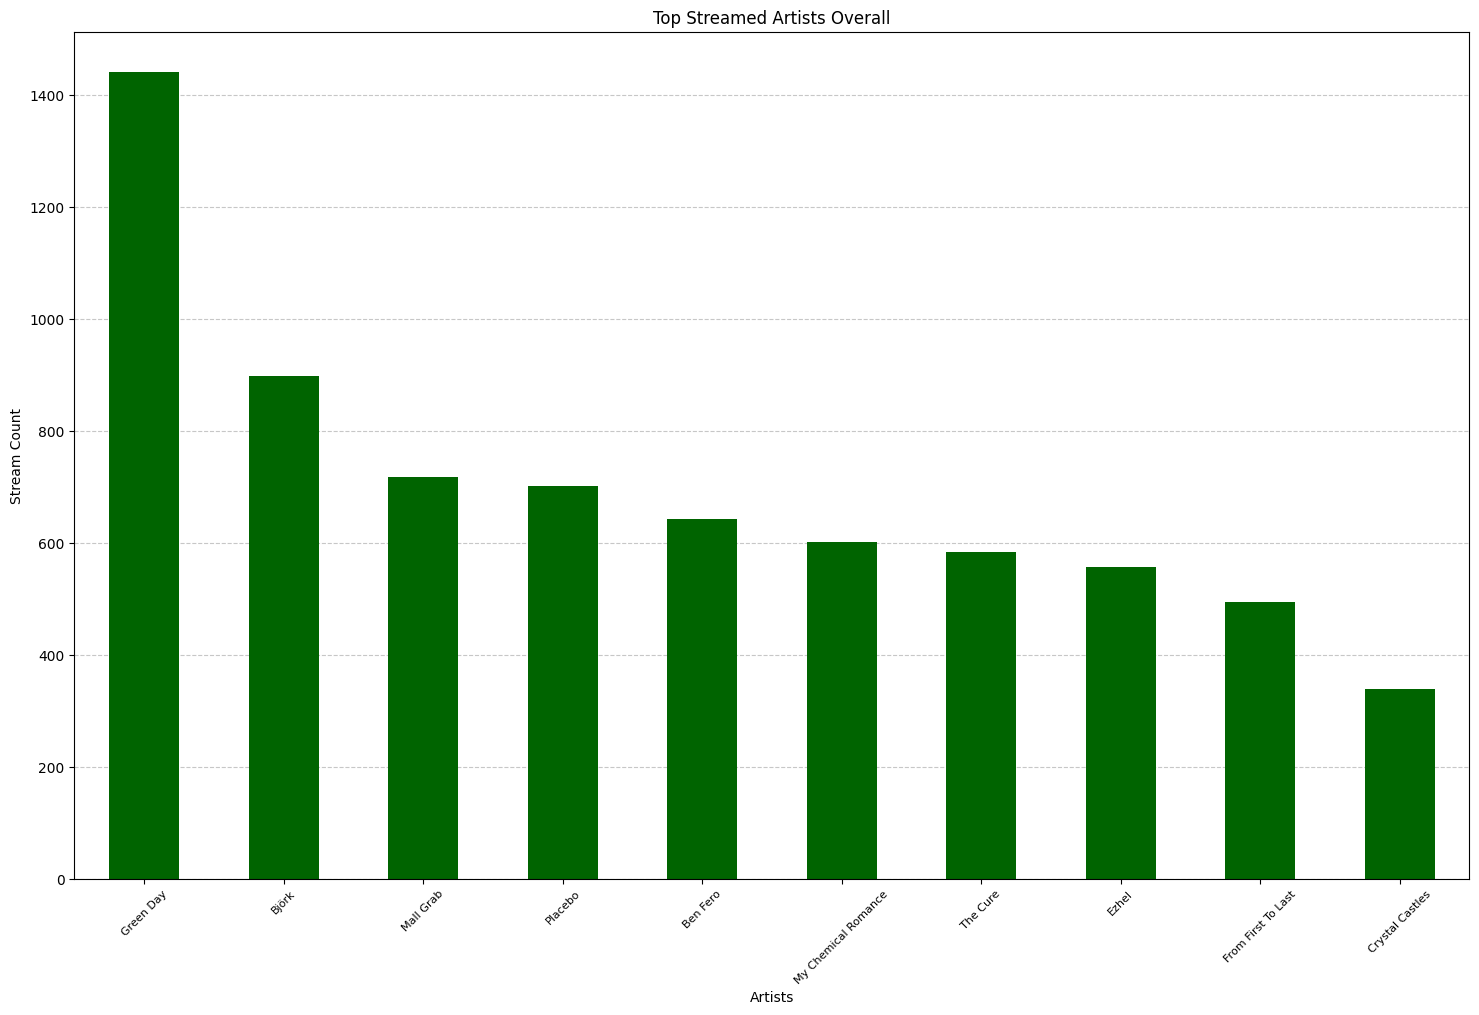

In [32]:
# plot data
plot_counts(top_artists_all, "Artists", labels=["Top Streamed Artists Overall"])
plt.close()

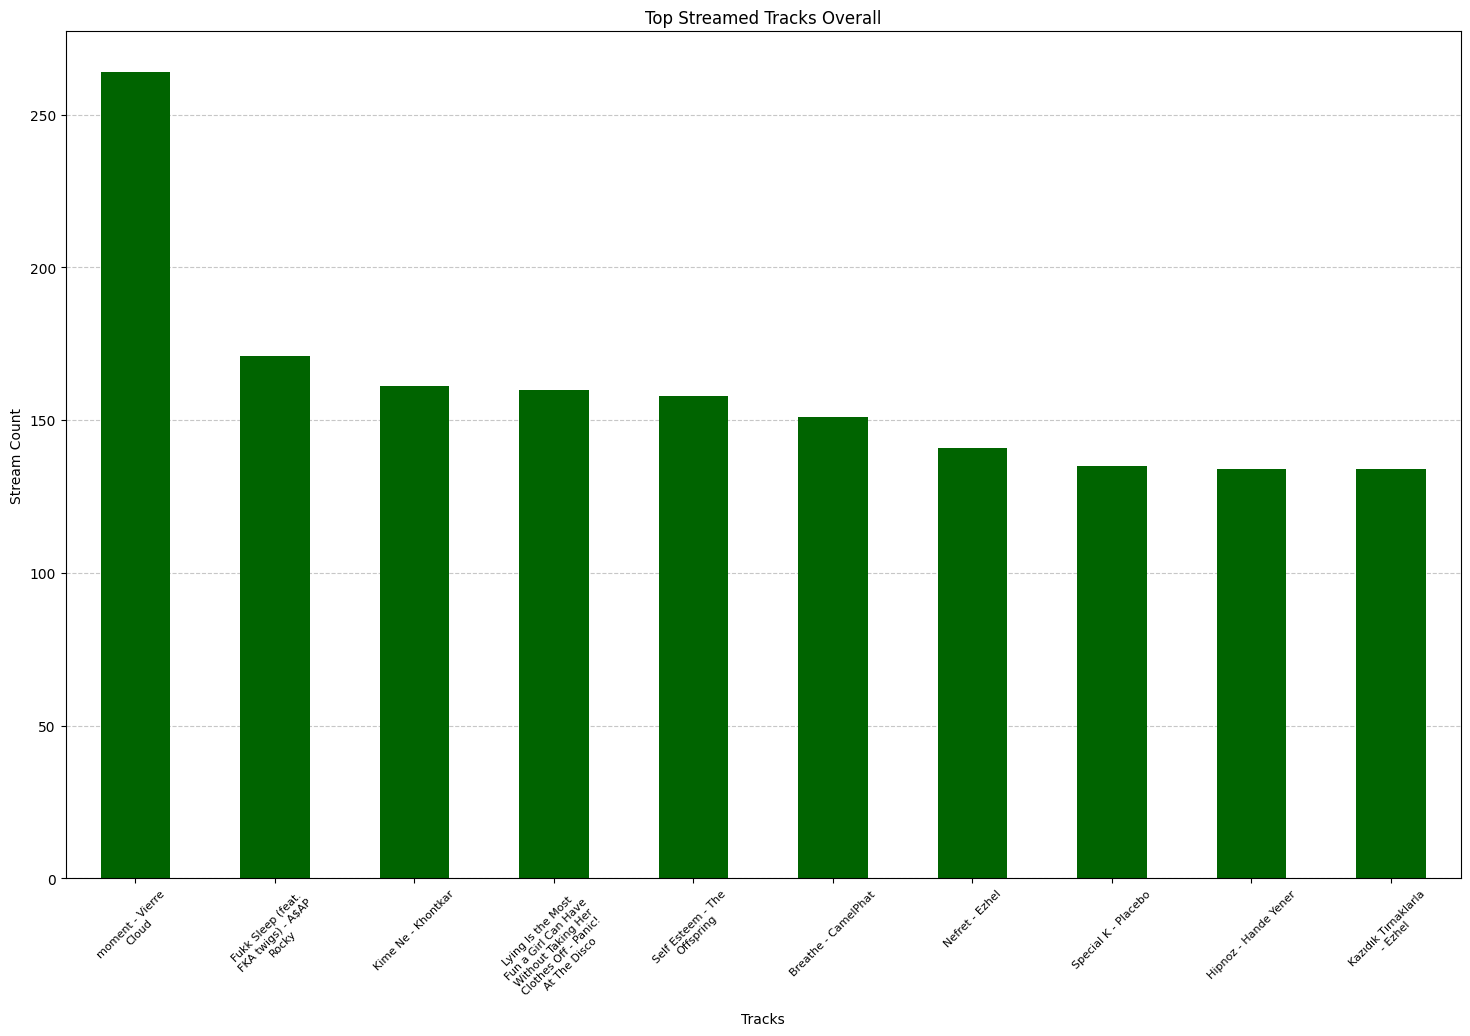

In [33]:
plot_counts(top_tracks_all, "Tracks", labels=["Top Streamed Tracks Overall"])
plt.close()

Genres

In [34]:
# Now lets access Spotify and match the artist genres to my most streamed data

top_artists_all = df_all["master_metadata_album_artist_name"].value_counts().nlargest(50)

result = [sp.search(i) for i in top_artists_all.index.tolist()]
track = [i['tracks']['items'][0] for i in result]
artist = [sp.artist(i["artists"][0]["external_urls"]["spotify"]) for i in track]

genres = [i["genres"] for i in artist]
genres = [i for sublist in genres if sublist for i in sublist]

genre_counts = Counter(genres)
genre_counts = genre_counts.most_common(15)

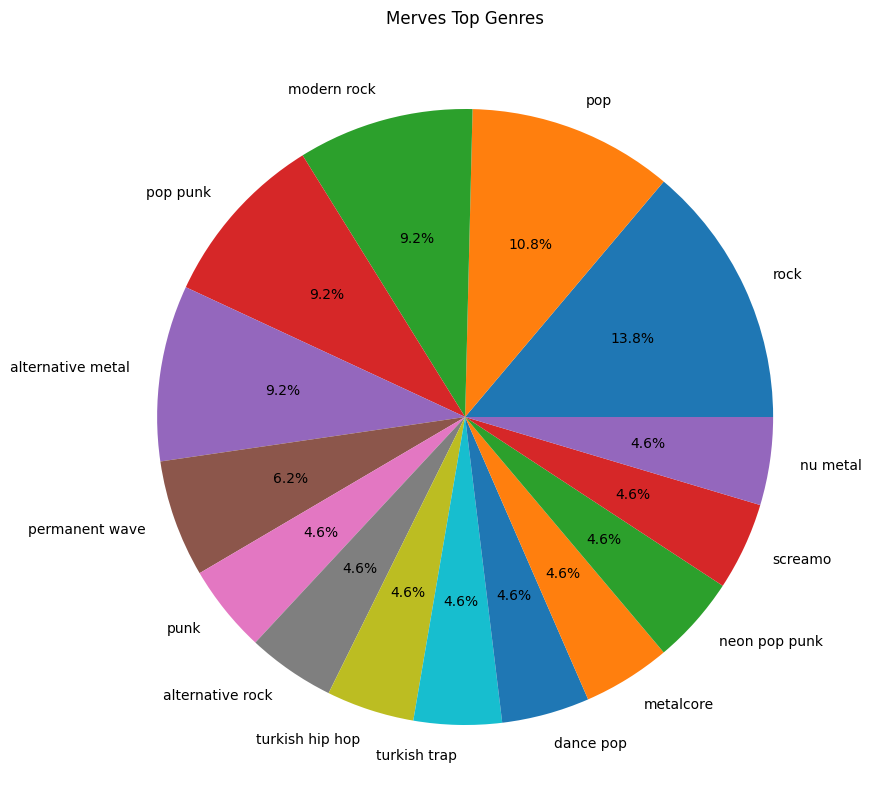

In [35]:
# Create a pie chart to show the most popular genres

genre_counts, counts = zip(*genre_counts)

plt.figure(figsize=(10, 10))
plt.pie(counts, labels=genre_counts, autopct='%1.1f%%')
plt.title('Merves Top Genres')

plt.show()


Most songs from one artist

In [36]:
df_unique = df_all.drop_duplicates(subset=["master_metadata_album_artist_name", "master_metadata_track_name"])
artist_n = df_unique["master_metadata_album_artist_name"].value_counts().nlargest(15)

artist_n

master_metadata_album_artist_name
Green Day         145
Eoin Colfer        68
Björk              64
Mall Grab          54
The Cure           45
Placebo            42
Beyoncé            35
Duman              32
HIM                29
Britney Spears     29
Linkin Park        28
Doja Cat           26
Rihanna            26
blink-182          25
K.I.Z              25
Name: count, dtype: int64

Artist counts word cloud

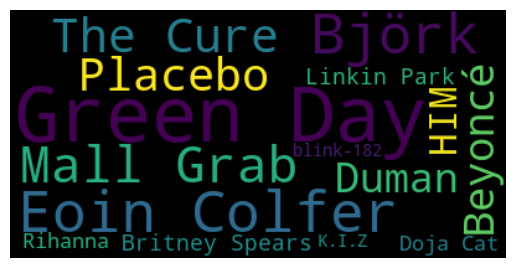

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(artist_n)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
ms_played = df_all.groupby('master_metadata_album_artist_name')['ms_played'].sum().nlargest(10)

ms_played

master_metadata_album_artist_name
Green Day              150252705
Mall Grab              149975966
Björk                  123345230
Ben Fero               101852709
Placebo                 65639135
Ezhel                   61925206
The Cure                50748393
From First To Last      45112492
My Chemical Romance     41699750
Crystal Castles         35893872
Name: ms_played, dtype: int64